# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Farhan Akmal
- **Email:** mfarhanakmal8@gmail.com
- **ID Dicoding:** farhanakml8

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Cuaca, Musim, Jam, Hari, dan Bulan terhadap jumlah peminjaman sepeda? Apakah ada pola peningkatan atau penurunan terhadap hal-hal tersebut?

- Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [40]:
!pip install streamlit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Wrangling

### Gathering Data

In [41]:
# Mengread data dari file hour.csv
df = pd.read_csv("data/hour.csv")

In [42]:
# Mengread data dari file day.csv
df_day = pd.read_csv("data/day.csv")

### Assessing Data

#### Membandingkan dataset hour dan day

In [43]:
# Menampilkan info dari tabel hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [44]:
# Menampilkan info dari tabel day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
# Menampilkan 5 data awal dari tabel hour
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [46]:
# Menampilkan 5 data awal dari tabel day
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Seperti yang bisa dilihat dari info dan data awal, perbedaan dataset hour dan day hanya terletak pada column hour, dimana dataset hour dipisah per jam sedangkan untuk day, dipisah per hari. Disini, saya akan menggunakan dataset hour agar dapat melihat data secara lebih spesifik.

In [47]:
# Menghapus tabel day karena tidak digunakan
del df_day

#### Menampilkan 5 Data Pertama

In [48]:
# Menampilkan 5 data pertama
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Menampilkan dimensi dari dataset

In [49]:
# Menampilkan dimensi dari dataset
print(f"Dataset ini terdiri dari {df.shape[0]} kolom dan {df.shape[1]} baris.")

Dataset ini terdiri dari 17379 kolom dan 17 baris.


#### Menampilkan berbagai info tentang dataset

In [50]:
# Menampilkan info tentang dataset
def showinfo():
  info = pd.DataFrame(index = df.columns)
  info['Datatype'] = df.dtypes
  info['Non null values'] = df.count()
  info['Unique values'] = df.nunique()
  info['Null values'] = df.isnull().sum()
  info['Duplicated values'] = df.duplicated().sum()
  return info

showinfo()

,Datatype,Non null values,Unique values,Null values,Duplicated values
instant,int64,17379,17379,0,0
dteday,object,17379,731,0,0
season,int64,17379,4,0,0
yr,int64,17379,2,0,0
mnth,int64,17379,12,0,0
hr,int64,17379,24,0,0
holiday,int64,17379,2,0,0
weekday,int64,17379,7,0,0
workingday,int64,17379,2,0,0
weathersit,int64,17379,4,0,0


Seperti yang bisa dilihat, Dataset yang kami gunakan sudah tidak memiliki Null Values dan Duplicated Values. Lalu, ada beberapa kolom yang memiliki categorical value seperti season, holiday, weekday, workingday. Kita akan mengubah tipe datanya nanti.

#### Menampilkan statistik pada dataset

In [51]:
# Menampilkan statistik pada dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


#### Mengubah nama kolom agar lebih jelas

In [52]:
# Mengubah nama kolom
df = df.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'hr': 'hour', 'weathersit': 'weather', 'hum':'humidity', 'casual': 'casual_user', 'registered': 'registered_user', 'cnt':'count'})

In [53]:
# Kolom setelah diubah
df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual_user', 'registered_user', 'count'],
      dtype='object')

#### Penghapusan outliers

Kita akan menghapus outlier menggunakan column count karena itu merupakan target dari dataset ini.

In [54]:
# Mengidentifikasi outliers
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df[(df['count'] < batas_bawah) | (df['count'] > batas_atas)]

In [55]:
# Penghapusan outliers
df = df[(df['count'] >= batas_bawah) & (df['count'] <= batas_atas)]
print(f"Dimensi dataset ini setelah penghapusan outliers adalah {df.shape[0]} kolom dan {df.shape[1]} baris.")

Dimensi dataset ini setelah penghapusan outliers adalah 16874 kolom dan 17 baris.


In [56]:
# Tampilan hasil setelah proses assesing data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,16874.0,8542.168899,5007.766040,1.00,4219.2500,8438.5000,12832.7500,17379.0000
season,16874.0,2.490399,1.111966,1.00,1.0000,2.0000,3.0000,4.0000
year,16874.0,0.487733,0.499864,0.00,0.0000,0.0000,1.0000,1.0000
month,16874.0,6.513275,3.462438,1.00,4.0000,7.0000,10.0000,12.0000
hour,16874.0,11.458101,6.962144,0.00,5.0000,11.0000,18.0000,23.0000
holiday,16874.0,0.029513,0.169244,0.00,0.0000,0.0000,0.0000,1.0000
weekday,16874.0,2.997748,2.013054,0.00,1.0000,3.0000,5.0000,6.0000
workingday,16874.0,0.678618,0.467021,0.00,0.0000,1.0000,1.0000,1.0000
weather,16874.0,1.430663,0.642689,1.00,1.0000,1.0000,2.0000,4.0000
temp,16874.0,0.492650,0.192455,0.02,0.3400,0.5000,0.6400,1.0000


### Cleaning Data

#### Mengubah datatype dari kolom-kolom yang memiliki categorical value

In [57]:
# Mengubah datatype dari kolom-kolom yang memiliki categorical value
categorical_columns = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
df[categorical_columns] = df[categorical_columns].astype('category')

#### Pengubahan nilai dari kolom dengan categorical value

In [58]:
# Pengubahan label musim
# season (1:spring, 2:summer, 3:fall, 4:winter)

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_mapping)

In [59]:
# Pengubahan label year
# yr : year (0: 2011, 1:2012)

year_mapping = {0: '2011', 1: '2012'}
df['year'] = df['year'].map(year_mapping)

In [60]:
# Pengubahan label month
# yr : year (1: January, 2: February ... 12: December)

month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['month'].map(month_mapping)

In [61]:
# Pengubahan label weekday
# weekday : (0: sunday, 1: monday ... 6: saturday)

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['weekday'] = df['weekday'].map(weekday_mapping)

In [62]:
# Pengubahan label holiday dan working day (Yes/No)
# holiday : (0: No, 1: Yes)
# workingday : (0: holiday or weekend, 1: not a holiday nor weekend)

yesno_mapping = {0: 'No', 1: 'Yes'}
df['holiday'] = df['holiday'].map(yesno_mapping)
df['workingday'] = df['workingday'].map(yesno_mapping)

In [63]:
# Pengubahan label weather
# weather :
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

weather_mapping = {1: 'Clear / Partly cloudy', 2: 'Misty', 3: 'Light rain / Light snow', 4: 'Heavy rain / Heavy snow'}
df['weather'] = df['weather'].map(weather_mapping)

#### Mengubah datatype dari kolom date menjadi datetime

In [64]:
# Mengubah datatype date
df['date'] = pd.to_datetime(df['date'])

#### Penghapusan kolom instant

Karena kolom instant hanya digunakan untuk menampilkan record index dari data, maka dianggap tidak akan berpengaruh. Jadi, saya mengdrop column instant.

In [65]:
# Penghapusan kolom instant
df = df.drop('instant', axis = 1)

In [66]:
# Gambaran Dataset setelah proses cleaning data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             16874 non-null  datetime64[ns]
 1   season           16874 non-null  category      
 2   year             16874 non-null  category      
 3   month            16874 non-null  category      
 4   hour             16874 non-null  category      
 5   holiday          16874 non-null  category      
 6   weekday          16874 non-null  category      
 7   workingday       16874 non-null  category      
 8   weather          16874 non-null  category      
 9   temp             16874 non-null  float64       
 10  atemp            16874 non-null  float64       
 11  humidity         16874 non-null  float64       
 12  windspeed        16874 non-null  float64       
 13  casual_user      16874 non-null  int64         
 14  registered_user  16874 non-null  int64     

## Exploratory Data Analysis (EDA)

### Explore Data

#### Penampilan hasil dataset setelah diproses

In [67]:
# Penampilan hasil dataset
df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,count
count,16874,16874,16874,16874,16874.0,16874,16874,16874,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,4,2,12,24.0,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2011,December,23.0,No,Sunday,Yes,Clear / Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4298,8644,1470,728.0,16376,2474,11451,11020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-26 23:54:06.699063808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


#### Pengelompokkan penyewaan sepeda berdasarkan musim  

In [68]:
# Ekslporasi data berdasarkan musim
df.groupby(by='season').agg({'casual_user' : ['mean','sum'], 'registered_user' : ['mean','sum'], 'count' : ['min', 'max', 'mean', 'sum']})

casual_user         registered_user         count                   \
              mean     sum            mean     sum   min  max        mean   
season                                                                      
Spring   13.598390   57426       94.812219  400392     1  623  108.410609   
Summer   43.666588  185714      145.792852  620057     1  642  189.459440   
Fall     47.889483  205829      163.638204  703317     1  641  211.527687   
Winter   28.033415  114937      152.838780  626639     1  642  180.872195   

                
           sum  
season          
Spring  457818  
Summer  805771  
Fall    909146  
Winter  741576

#### Pengelompokkan penyewaan sepeda berdasarkan bulan dan tahun

In [69]:
# Ekplorasi data berdasarkan bulan dan tahun
df.groupby(by=['year','month']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                         
                 min  max        mean     sum
year month                                   
2011 January       1  249   55.507267   38189
     February      1  327   74.291217   48215
     March         1  336   87.732877   64045
     April         1  530  131.947149   94870
     May           1  611  182.555108  135821
     June          1  638  199.322222  143512
     July          1  596  189.974462  141341
     August        1  621  186.356164  136040
     September     1  628  177.709902  127418
     October       1  625  166.232840  123511
     November      1  553  142.095967  102167
     December      1  477  117.844804   87323
2012 January       1  559  130.558704   96744
     February      1  610  149.041908  103137
     March         1  641  196.742574  139097
     April         1  640  212.562315  143267
     May           1  642  231.942693  161896
     June          4  642  239.995448  158157
     July          2  633  236.389291  163345
     August        3  641  238.875556  161241
     September     3  640  234.081340  146769
     October       1  642  226.945312  145245
     November      1  638  198.598278  138423
     December      1  636  157.116598  114538

#### Pengelompokkan penyewaan sepeda berdasarkan jam

In [70]:
# Ekplorasi data berdasarkan bulan dan tahun
df.groupby(by=['hour']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                         
       min  max        mean     sum
hour                               
0        2  283   53.898072   39130
1        1  168   33.375691   24164
2        1  132   22.869930   16352
3        1   79   11.727403    8174
4        1   28    6.352941    4428
5        1   66   19.889819   14261
6        1  213   76.044138   55132
7        1  596  212.064649  154171
8        5  641  284.525000  170715
9       14  426  219.309491  159438
10       8  539  173.668501  126257
11      10  627  206.910345  150010
12       3  642  242.828411  172651
13      11  638  239.559490  169129
14      12  640  231.647059  165396
15       7  640  243.256983  174172
16      11  642  305.750696  219529
17      15  638  372.551127  214962
18      23  642  349.410684  209297
19      11  640  304.474790  217395
20      11  567  226.030220  164550
21       6  584  172.314560  125445
22       9  502  131.335165   95612
23       2  256   87.831044   63941

#### Pengelompokkan penyewaan sepeda berdasarkan holiday


In [71]:
# Ekplorasi data berdasarkan holiday
df.groupby(by=['holiday']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                          
          min  max        mean      sum
holiday                                
No          1  642  173.257450  2837264
Yes         1  597  154.712851    77047

#### Pengelompokkan penyewaan sepeda berdasarkan hari

In [72]:
# Ekplorasi data berdasarkan hari
df.groupby(by=['weekday']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                         
            min  max        mean     sum
weekday                                 
Sunday        1  640  171.730396  424861
Monday        1  642  166.750831  401536
Tuesday       1  641  170.280524  403054
Wednesday     1  641  167.648172  398835
Thursday      1  640  173.613215  412505
Friday        1  642  180.949153  437716
Saturday      1  642  177.806610  435804

#### Pengelompokkan penyewaan sepeda berdasarkan hari kerja

In [73]:
# Ekplorasi data berdasarkan hari kerja
df.groupby(by=['workingday']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                          
             min  max        mean      sum
workingday                                
No             1  642  172.913885   937712
Yes            1  642  172.613658  1976599

#### Pengelompokkan penyewaan sepeda berdasarkan cuaca

In [74]:
# Ekplorasi data berdasarkan cuaca
df.groupby(by=['weather']).agg({'count' : ['min', 'max', 'mean', 'sum']})

count                          
                          min  max        mean      sum
weather                                                
Clear / Partly cloudy       1  642  185.314247  2042163
Misty                       1  642  162.626463   722712
Light rain / Light snow     1  627  106.050462   149213
Heavy rain / Heavy snow    23  164   74.333333      223

#### Menghasilkan file csv dari hasil pengolahan data untuk digunakan sebagai data untuk dashboard

In [76]:
# Menghasilkan file csv
df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Cuaca dan Musim terhadap jumlah peminjaman sepeda? Apakah ada pola peningkatan atau penurunan terhadap hal-hal tersebut?


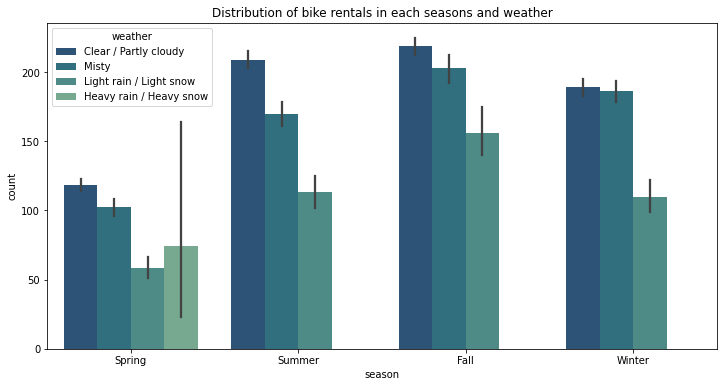

In [77]:
# Visualisasi Pengaruh Cuaca dan Musim terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12,6))
ax = sns.barplot(x='season', y='count', data=df, hue = 'weather', palette='crest_r')
plt.title('Distribution of bike rentals in each seasons and weather')
plt.show()

<p align = "justify">
Seperti yang dapat dilihat dari hasil visualisasi tersebut, dapat disimpulkan bahwa terdapat korelasi antara Cuaca dan Musim dengan Jumlah peminjaman sepeda. Cuaca cerah (Clear) memiliki jumlah peminjaman sepeda paling banyak dibandingkan cuaca-cuaca lainnya, diikuti oleh cuaca berkabut (Misty), lalu cuaca sedikit hujan atau salju (Light rain/snow), terakhir cuaca hujan lebat atau salju (Heavy rain/snow). Hal ini disebabkan bahwa, untuk peminjaman sepeda biasanya banyak disaat cuaca tidak ada apa apa. Apabila cuaca sedang hujan atau salju, maka akan mengurang jumlah peminjamannya. Sedangkan untuk musim, musim gugur (Fall) lah yang memiliki jumlah peminjaman terbanyak dibandingkan dengan musim-musim lainnya, diikuti oleh musim panas (Summer), lalu musim salju (Winter), terakhir musim semi (Spring). Hal ini disebabkan karena peminjaman sepeda biasanya banyak pada musim-musim yang tidak banyak halangan, salju seperti musim gugur dan musim panas.

<p align = "justify">
Berdasarkan urutan cuaca, pola yang terdapat adalah penurunan, dimana pola selalu menurun dari cuaca cerah, ke cuaca berkabut, lalu cuaca sedikit hujan atau salju, lalu terakhir cuaca hujan lebat atau salju. Sedangkan, berdasarkan urutan musim, pola yang terdapat adalah naik turun, dimana terdapat peningkatan dari musim semi ke musim panas, lalu terdapat peningkatan dari musim panas ke musim gugur, lalu terdapat penurunan dari musim gugur ke musim salju.

### Pertanyaan 2: Apakah terdapat perbedaan pola penggunaan sepeda terhadap berdasarkan bulan dan tahun?

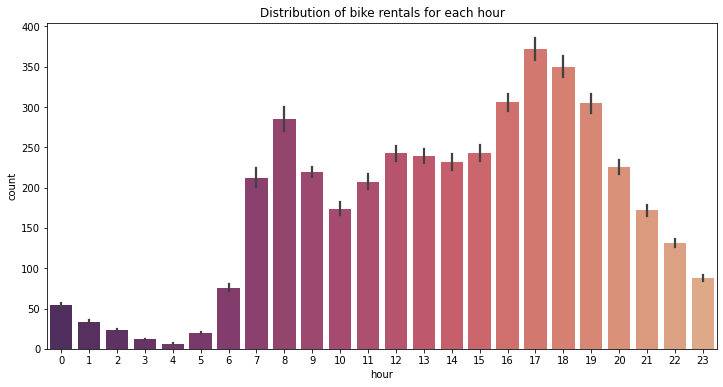

In [78]:
# Visualisasi Pengaruh Cuaca dan Musim terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12,6))
ax = sns.barplot(x='hour', y='count', data=df, palette='flare_r')
plt.title('Distribution of bike rentals for each hour')
plt.show()

<p align = "justify">
Seperti yang dapat dilihat dari hasil visualisasi tersebut, dapat disimpulkan bahwa terdapat pengaruh antara jam dengan jumlah peminjaman sepeda. Jumlah peminjaman disaat pagi hari (0 - 6) sangat sedikit karena kebanyakan orang sedang beristirahat atau tidur. Disaat sedang memulai kegiatan di pagi hari (Dari jam 7), mulai terdapat peningkatan dari jumlah peminjaman. Titik puncak jumlah peminjaman sepeda terdapat pada jam 17.

## Conclusion

Jadi, dari hasil pengeksplorasian dan pengvisualisasian data yang sudah dilakukan, dapat disimpulkan bahwa :
- Terdapat korelasi antara Cuaca dan Musim dengan Jumlah peminjaman sepeda. Cuaca cerah (Clear) memiliki jumlah peminjaman sepeda paling banyak dibandingkan cuaca-cuaca lainnya. Hal ini disebabkan bahwa, untuk peminjaman sepeda biasanya banyak disaat cuaca tidak ada apa apa. Apabila cuaca sedang hujan atau salju, maka akan mengurang jumlah peminjamannya. Sedangkan untuk musim, musim gugur (Fall) lah yang memiliki jumlah peminjaman terbanyak dibandingkan dengan musim-musim lainnya. Hal ini disebabkan karena peminjaman sepeda biasanya banyak pada musim-musim yang tidak banyak halangan, salju seperti musim gugur dan musim panas.
- Terdapat pengaruh antara jam dengan jumlah peminjaman sepeda. Jumlah peminjaman disaat pagi hari (0 - 6) sangat sedikit karena kebanyakan orang sedang beristirahat atau tidur. Disaat sedang memulai kegiatan di pagi hari (Dari jam 7), mulai terdapat peningkatan dari jumlah peminjaman. Titik puncak jumlah peminjaman sepeda terdapat pada jam 17.